In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import readline
import os

In [2]:
# Open File
def Create_DF(File):
    Data = open(File, 'r')
    Rows = []
#
# Organize Data
    for Line in Data:
        Rows.append(Line.strip())
#print (Rows)
#
# Organize Data Into Dictionary Containing Arrays
    Storm_Code = []
    Storm_List = []
    for i in range(len(Rows)):
        if Rows[i][0:5] == 'start':
            Code = Rows[i][41:45]
            Storm_List.append(Code)
        else:
            Storm_Code.append(Code)
    Array = numpy.zeros((13, len(Rows)-len(Storm_List)))
    Time = []
    k = -1
    for i in range(len(Rows)):
        if Rows[i][0:5] == 'start':
            k += 1
        else:
            l = len(Rows[i]) - 100
            Array[0][i-k-1] = float(Rows[i][0:6+l])
            Array[1][i-k-1] = float(Rows[i][9+l:14+l])
            Array[2][i-k-1] = float(Rows[i][17+l:24+l])
            Array[3][i-k-1] = float(Rows[i][26+l:31+l])
            Array[4][i-k-1] = float(Rows[i][34+l:41+l])
            Array[5][i-k-1] = float(Rows[i][44+l:51+l])
            Array[6][i-k-1] = float(Rows[i][54+l:61+l])
            Array[7][i-k-1] = float(Rows[i][64+l:71+l])
            Array[8][i-k-1] = float(Rows[i][74+l:81+l])
            Time.append(datetime.datetime(year=int(Rows[i][84+l:88+l]), month=int(Rows[i][90+l:92+l]), \
            day=int(Rows[i][94+l:96+l]), hour=int(Rows[i][98+l:100+l])))
#        Array[9][i-k-1] = int(Rows[i][84:88])
#        Array[10][i-k-1] = int(Rows[i][90:92])
#        Array[11][i-k-1] = int(Rows[i][94:96])
#        Array[12][i-k-1] = int(Rows[i][98:100])
#        print (Rows[i])
#        print (float(Rows[i][9:14]))
#        print (Rows[i][17])
#print (Array)
#
# Create DataFrame to Store Data
    DF = pandas.DataFrame({"Code": Storm_Code, "Lon": Array[0], "Lat": Array[1], "SLP(hPa)": Array[2], \
    "Winds(m/s)": Array[3], "Dist(m)": Array[4], "Angle": Array[5], "B": Array[6], "VLT": Array[7], "VUT": Array[8], \
    "Time(Z)": Time})
#"Year": Array[9], "Month": Array[10], "Day": Array[11], "Hour(Z)": Array[12]})
    return (DF, Storm_List)
Dtime900_DF_Init, Dtime900_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/traj_data/traj_et_dtime900.002_avg')
Dtime900_DF_Init

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
0,0024,-82.19,27.99,1015.45,13.9,-999.00,-999.00,4.71,36.21,-39.35,1985-06-19 12:00:00
1,0024,-82.26,27.79,1015.45,13.8,23.61,197.20,6.18,-17.21,-21.24,1985-06-19 18:00:00
2,0024,-82.33,27.58,1015.45,13.7,23.61,197.23,3.28,-12.33,-14.50,1985-06-20 00:00:00
3,0024,-82.40,27.38,1015.45,13.7,23.62,197.27,3.45,-4.28,-13.71,1985-06-20 06:00:00
4,0024,-82.46,28.31,1014.22,11.7,103.18,356.87,1.72,5.56,3.60,1985-06-20 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
11534,1525,-77.88,40.72,998.40,12.5,341.66,317.64,83.26,-204.90,-206.01,2014-11-12 18:00:00
11535,1525,-80.75,42.25,1001.40,18.5,293.74,306.02,83.03,-299.50,-178.96,2014-11-13 00:00:00
11536,1525,-81.75,42.00,1001.48,14.8,87.03,251.42,73.58,-318.15,-145.49,2014-11-13 06:00:00
11537,1525,-82.50,42.00,1001.89,12.5,61.98,270.00,62.77,-305.39,-144.10,2014-11-13 12:00:00


In [3]:
# Define Cyclone Type, Set Shape and Colour Code
SLP_Colours = ['indigo', 'purple', 'darkviolet', 'mediumvioletred', 'deeppink', 'red', 'orangered', \
'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', \
'lightseagreen', 'darkcyan', 'dodgerblue', 'deepskyblue', 'cyan']
SLP_Bounds = numpy.arange(930,1015,5)
#SLP_Colour_Labels = ['>1010hPa', '1005-1010hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', \
#'985-990hPa', '980-985hPa', '975-980hPa', '970-975hPa', '965-970hPa', '960-965hPa', \
#'955-960hPa', '950-955hPa', '945-950hPa', '940-945hPa', '935-940hPa', '930-935hPa', '<=930hPa'].reverse()
def Cyclone_Type(DF, Storm_List):
# Cyclone Type and Shape Code
    Cyclone_Type = []
    Plot_Shape = []
    for i in range(len(Storm_List)):
        DF_Storm = DF[DF['Code'] == Storm_List[i]]
        for j in range(len(DF_Storm)):
            if j != 0:
                if numpy.array(DF_Storm['B'])[j] < 15 and numpy.array(DF_Storm['VLT'])[j] > 0:
                    Cyclone_Type.append("Tropical")
                    Plot_Shape.append("o")
                elif numpy.array(DF_Storm['B'])[j] > 15 and numpy.array(DF_Storm['VLT'])[j] < 0:
                    Cyclone_Type.append("Extratropical")
                    Plot_Shape.append("^")
                else:
                    Cyclone_Type.append("Transition")
                    Plot_Shape.append("s")
            else:
                if numpy.array(DF_Storm['B'])[j+1] < 15 and numpy.array(DF_Storm['VLT'])[j+1] > 0:
                    Cyclone_Type.append("Tropical")
                    Plot_Shape.append("o")
                elif numpy.array(DF_Storm['B'])[j+1] > 15 and numpy.array(DF_Storm['VLT'])[j+1] < 0:
                    Cyclone_Type.append("Extratropical")
                    Plot_Shape.append("^")
                else:
                    Cyclone_Type.append("Transition")
                    Plot_Shape.append("s")
    #print (Plot_Shape)
    DF["Type"] = Cyclone_Type
    DF["Shape"] = Plot_Shape
#    
# SLP Colour Code
    Plot_Colour = []
    for i in range(len(DF['SLP(hPa)'])):
        for k in range(len(SLP_Colours)):
            if k == 0:
                if DF['SLP(hPa)'][i] <= SLP_Bounds[k]:
                    Plot_Colour.append(SLP_Colours[k])
            elif k != len(SLP_Colours)-1:
                if DF['SLP(hPa)'][i] <= SLP_Bounds[k] and DF['SLP(hPa)'][i] > SLP_Bounds[k-1]:
                    Plot_Colour.append(SLP_Colours[k])
            else:
                if DF['SLP(hPa)'][i] > SLP_Bounds[k-1]:
                    Plot_Colour.append(SLP_Colours[k])
    #print (Plot_Colour)
    DF["Colour"] = Plot_Colour
    return (DF)
Dtime900_DF = Cyclone_Type(Dtime900_DF_Init, Dtime900_Storm_List)

In [4]:
# Create Legend
def SLP_Legend(Loc):
#    for c in range(len(SLP_Colours)):
#        pyplot.scatter([-728], [-728], c=SLP_Colours[c], label=SLP_Colour_Labels[c])
    pyplot.scatter([-728], [-728], c='cyan', marker='o', linewidths=0.8, edgecolors='black', label='Tropical')
    pyplot.scatter([-728], [-728], c='cyan', marker='s', linewidths=0.8, edgecolors='black', label='Transition')
    pyplot.scatter([-728], [-728], c='cyan', marker='^', linewidths=0.8, edgecolors='black', label='Extratropical')
    pyplot.legend(loc=Loc, fontsize=12)

In [5]:
Dtime900_DF[Dtime900_DF['SLP(hPa)'] <= 905]

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape,Colour
74,0027,-64.64,17.56,902.19,72.6,107.19,316.57,-0.18,288.44,383.70,1985-08-12 12:00:00,Tropical,o,indigo
75,0027,-65.34,18.64,899.65,83.4,141.35,328.82,-1.33,303.15,416.31,1985-08-12 18:00:00,Tropical,o,indigo
78,0027,-67.76,22.69,894.02,84.0,186.86,328.10,-1.99,340.00,484.78,1985-08-13 12:00:00,Tropical,o,indigo
79,0027,-68.63,23.93,889.16,88.2,164.17,327.74,-1.23,362.27,507.75,1985-08-13 18:00:00,Tropical,o,indigo
80,0027,-69.53,5.81,895.16,108.6,227.87,336.71,-0.98,377.11,519.81,1985-08-14 00:00:00,Tropical,o,indigo
81,0027,-70.56,27.22,887.54,80.2,187.24,326.97,-0.76,397.38,534.94,1985-08-14 06:00:00,Tropical,o,indigo
82,0027,-71.12,28.69,888.53,82.9,172.25,341.63,0.63,403.16,536.84,1985-08-14 12:00:00,Tropical,o,indigo
83,0027,-71.59,30.23,891.59,79.5,177.10,345.43,2.42,399.24,526.88,1985-08-14 18:00:00,Tropical,o,indigo
84,0027,-71.89,31.88,898.54,74.5,186.67,351.16,5.07,384.87,511.28,1985-08-15 00:00:00,Tropical,o,indigo
1271,0236,-77.00,23.08,902.56,87.1,115.10,294.43,-4.32,316.57,405.44,1989-08-23 00:00:00,Tropical,o,indigo


In [6]:
# Histogram of VLT Values
#Fig = pyplot.figure(figsize=(8,6))
#Axis = Fig.add_subplot(1,1,1)
#Axis.hist(Dtime900_DF["VLT"], bins=numpy.arange(-1000,625,25), color='limegreen')
#pyplot.xlim(-600,600)
#Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of B Values
#Fig = pyplot.figure(figsize=(8,6))
#Axis = Fig.add_subplot(1,1,1)
#Axis.hist(Dtime900_DF["B"], bins=numpy.arange(-45,135,5), color='limegreen')
#pyplot.xlim(-50,135)
#Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of VLT Values
#Fig = pyplot.figure(figsize=(8,6))
#Axis = Fig.add_subplot(1,1,1)
#Axis.hist(Dtime900_DF["VUT"], bins=numpy.arange(-1000,625,25), color='limegreen')
#pyplot.xlim(-600,600)
#Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [7]:
# Plot Cyclone Track
def Plot_Cyclone_Track(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Lon = numpy.array(DF_Storm['Lon'])
    Lat = numpy.array(DF_Storm['Lat'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    Axis.plot(Lon, Lat, c='black', linewidth=0.5, alpha=0.8)
    for k in range(len(Lon)):
        pyplot.scatter(Lon[k], Lat[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    x_Min = (int(round(numpy.min(Lon) / 5)) - 1) * 5
    x_Max = (int(round(numpy.max(Lon) / 5)) + 1) * 5
    y_Min = (int(round(numpy.min(Lat) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(Lat) / 5)) + 1) * 5
    x_Axis = numpy.arange(x_Min,x_Max+5,5)
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.12, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [8]:
# Plot Cyclone SLP
def Plot_Cyclone_SLP(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    SLP = numpy.array(DF_Storm['SLP(hPa)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, SLP, c='black', linestyle='--', linewidth=0.5, alpha=0.8)
    for k in range(len(Time)):
        Axis.scatter(Time[k], SLP[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Sea Level Pressure (SLP)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = (int(round(numpy.min(SLP) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(SLP) / 5)) + 1) * 5
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [9]:
# Plot Cyclone Windspeed
def Plot_Cyclone_Winds(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    Winds = numpy.array(DF_Storm['Winds(m/s)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, Winds, c='black', linestyle='--', linewidth=0.5, alpha=0.8)
    for k in range(len(Time)):
        Axis.scatter(Time[k], Winds[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Maximum Windspeed (m/s)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = 0
    y_Max = (int(round(numpy.max(Winds) / 5)) + 1) * 5
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(0,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [10]:
# Plot Cyclone Phase Diagram
def Plot_Cyclone_Phase(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    VLT = numpy.array(DF_Storm['VLT'])[1:]
    VUT = numpy.array(DF_Storm['VUT'])[1:]
    B = numpy.array(DF_Storm['B'])[1:]
    Plot_Colour = list(DF_Storm['Colour'])[1:]
    Plot_Shape = list(DF_Storm['Shape'])[1:]
#
# Plotting VUT VLT
    Fig = pyplot.figure(figsize=(16,8))
    Axis = Fig.add_subplot(1,2,1)
    x_Axis = numpy.arange(-500,600,100)
    y_Axis = numpy.arange(-30,130,10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-500,500)
    pyplot.ylim(-30,120)
    pyplot.fill_between([0,500], 15, 120, color='violet', alpha=0.2)
    pyplot.fill_between([-500,0], 15, 120, color='mediumblue', alpha=0.2)
    pyplot.fill_between([0,500], -30, 15, color='red', alpha=0.2)
    pyplot.fill_between([-500,0], -30, 15, color='darkgrey', alpha=0.2)
    pyplot.plot([-500,500], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-30,120], 'black', linewidth=0.5)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    Axis.plot(VLT, B, c='black', linestyle='--', linewidth=0.8, alpha=0.8)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], B[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.3, edgecolors='black', s=78)
    SLP_Legend(Loc)
#
# Plotting VUT VLT
    Axis = Fig.add_subplot(1,2,2)
    x_Axis = numpy.arange(-500,600,100)
    y_Axis = numpy.arange(-500,600,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-500,500)
    pyplot.ylim(-500,500)
    pyplot.fill_between([0,500], 500, color='red', alpha=0.2)
    pyplot.fill_between([-500,0], 500, color='lightskyblue', alpha=0.2)
    pyplot.fill_between([0,500], -500, color='orangered', alpha=0.2)
    pyplot.fill_between([-500,0], -500, color='mediumblue', alpha=0.2)
    pyplot.plot([-500,500], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-500,500], 'black', linewidth=0.5)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    Axis.plot(VLT, VUT, c='black', linestyle='--', linewidth=0.8, alpha=0.8)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], VUT[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.3, edgecolors='black', s=78)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)

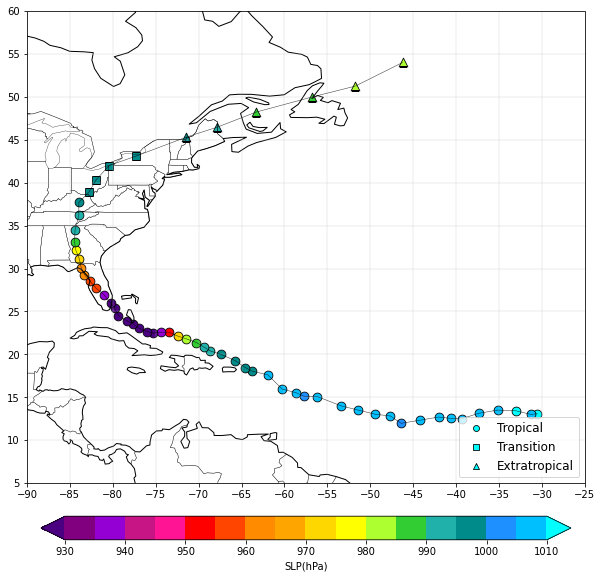

In [11]:
Plot_Cyclone_Track('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 4)

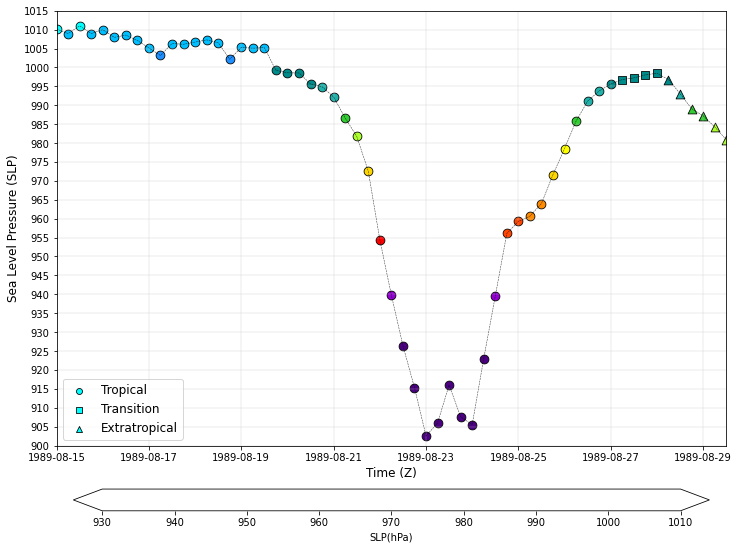

In [12]:
Plot_Cyclone_SLP('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 3)

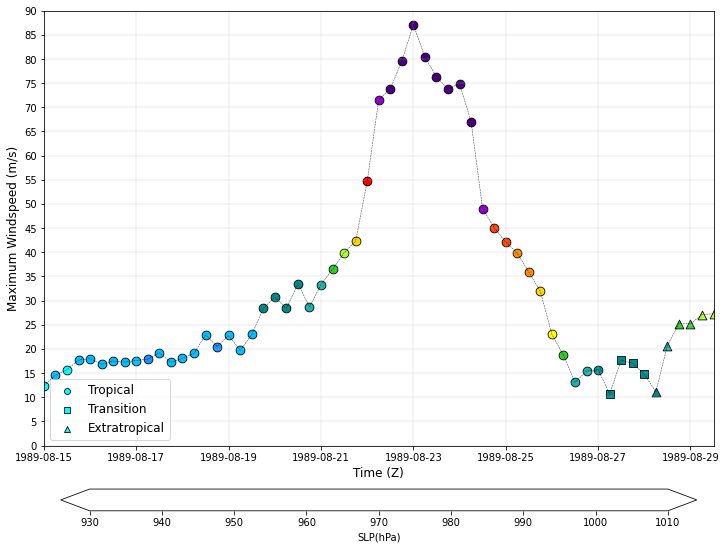

In [13]:
Plot_Cyclone_Winds('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 3)

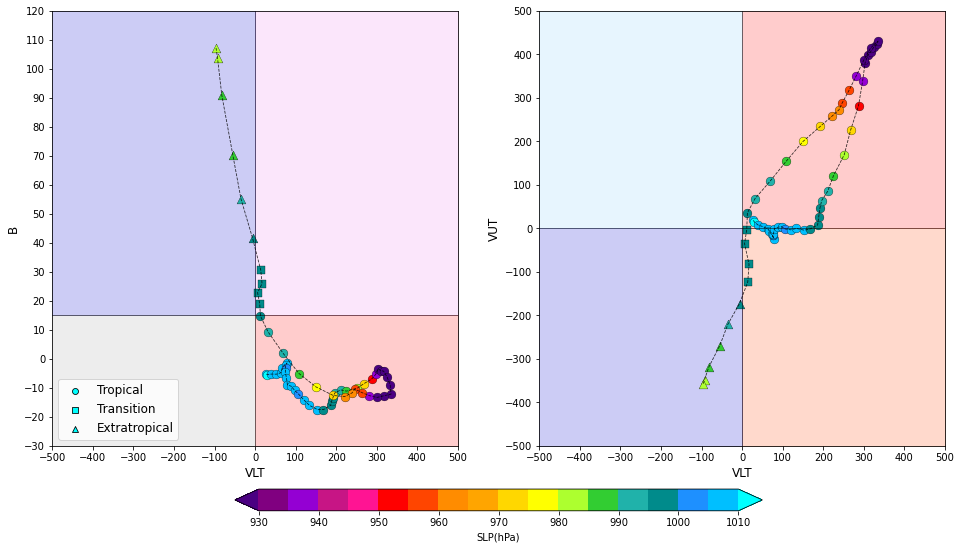

In [14]:
Plot_Cyclone_Phase('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 3)

In [15]:
# Create Phase Distribution Bins
def Create_Bins(VT_Min, VT_Max, VT_Bin_Width, B_Min, B_Max, B_Bin_Width):
    VLT_Bins = numpy.arange(VT_Min, VT_Max+VT_Bin_Width, VT_Bin_Width)
    B_Bins = numpy.arange(B_Min, B_Max+B_Bin_Width, B_Bin_Width)
    VUT_Bins = numpy.arange(VT_Min, VT_Max+VT_Bin_Width, VT_Bin_Width)
    return (VLT_Bins, B_Bins, VUT_Bins)
VLT_Bins, B_Bins, VUT_Bins = Create_Bins(-600,600,50,-45,135,7.5)
Bins_Bounds = numpy.array([-600,600,50,-45,135,7.5])
#VLT_Bins
#VLT_Bins = numpy.arange(-500,520,20)
#B_Bins = numpy.arange(-30,123,3)
#VUT_Bins = numpy.arange(-500,520,20)

In [16]:
# Create Function to Calculate Phase Space Distribution
def Phase_Space_Distribution(DF, VLT_Bins, B_Bins, VUT_Bins):
    VLT_B_Count = numpy.zeros((len(VLT_Bins)-1, len(B_Bins)-1))
    VLT_VUT_Count = numpy.zeros((len(VLT_Bins)-1, len(VUT_Bins)-1))
    VLT_B_Length = 0
    VLT_VUT_Length = 0
#    Length = len(DF["VLT"])
#    VLT_Width = numpy.zeros(len(VLT_Bins)-1)
#    B_Width = numpy.zeros(len(B_Bins)-1)
#    VUT_Width = numpy.zeros(len(VUT_Bins)-1)
#    VLT_B_Density = numpy.zeros((len(VLT_B_Count), len(VLT_B_Count[0])))
#    VLT_VUT_Density = numpy.zeros((len(VLT_VUT_Count), len(VLT_VUT_Count[0])))
#
# Count Phase Space Distribution
    for i in range(len(DF["VLT"])):
        for j in range(len(VLT_Bins)-1):
            if DF["VLT"][i] > VLT_Bins[j] and DF["VLT"][i] <= VLT_Bins[j+1]:
                for k in range(len(B_Bins)-1):
                    if DF["B"][i] > B_Bins[k] and DF["B"][i] <= B_Bins[k+1]:
                        VLT_B_Count[j][k] += 1
                        VLT_B_Length += 1
                for l in range(len(VUT_Bins)-1):
                    if DF["VUT"][i] > VUT_Bins[l] and DF["VUT"][i] <= VUT_Bins[l+1]:
                        VLT_VUT_Count[j][l] += 1
                        VLT_VUT_Length += 1
#
# Calculate Phase Space Density
    VLT_B_Density = VLT_B_Count / VLT_B_Length * 1000
    VLT_VUT_Density = VLT_VUT_Count / VLT_VUT_Length * 1000
#    for i in range(len(DF["VLT"])):
#        for j in range(len(VLT_B_Count)):
#            VLT_Width[j] = VLT_Bins[j+1] - VLT_Bins[j]
#            for k in range(len(VLT_B_Count[0])):
#                B_Width[k] = B_Bins[k+1] - B_Bins[k]
#                VLT_B_Density[j][k] = VLT_B_Count[j][k] / (VLT_Width[j] * B_Width[k]) * (VLT_Size * B_Size)
#            for l in range(len(VLT_VUT_Count[0])):
#                VUT_Width[l] = VUT_Bins[l+1] - VUT_Bins[l]
#                VLT_VUT_Density[j][l] = VLT_VUT_Count[j][l] / (VLT_Width[j] * VUT_Width[l]) * (VLT_Size * VUT_Size)
    return (VLT_B_Density, VLT_VUT_Density)
Dtime900_VLT_B, Dtime900_VLT_VUT = Phase_Space_Distribution(Dtime900_DF, VLT_Bins, B_Bins, VUT_Bins)

In [17]:
# Calculate Percentage of Points in Each Quadrant
def Phase_Space_Quadrant(Density, Var):
    x_Length = len(Density)
    y_Length = len(Density[0])
    x_Mid = int(x_Length / 2)
    Right_Half = Density[x_Mid:]
    Left_Half = Density[:x_Mid]
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    if Var == "VUT":
        y_Mid = int(y_Length / 2)
    elif Var == "B":
        y_Mid = int(y_Length / 3)
    for i in range(len(Right_Half)):
        Top_Right = numpy.sum(Right_Half[i][y_Mid:])
        Q1 += Top_Right
        Bottom_Right = numpy.sum(Right_Half[i][:y_Mid])
        Q4 += Bottom_Right
    for j in range(len(Left_Half)):
        Top_Left = numpy.sum(Left_Half[j][y_Mid:])
        Q2 += Top_Left
        Bottom_Left = numpy.sum(Left_Half[j][:y_Mid])
        Q3 += Bottom_Left
    Q1_Percent = Q1 / 1000.
    Q2_Percent = Q2 / 1000.
    Q3_Percent = Q3 / 1000.
    Q4_Percent = Q4 / 1000.
    return (Q1_Percent, Q2_Percent, Q3_Percent, Q4_Percent)

In [18]:
# Create Function For Colours
Dist_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
#Dist_Bounds = numpy.array([0,0.5,1,2,3,4,6,8,10,15,20,25,30])
Dist_Bounds = numpy.array([0,1,2.5,5,7.5,10,15,20,30,40,50,60])
def Dist_Colour(Density):
    for k in range(len(Dist_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k != len(Dist_Colours)-1:
                if Density <= Dist_Bounds[k+1] and Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
            else:
                if Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
    return (Colour)

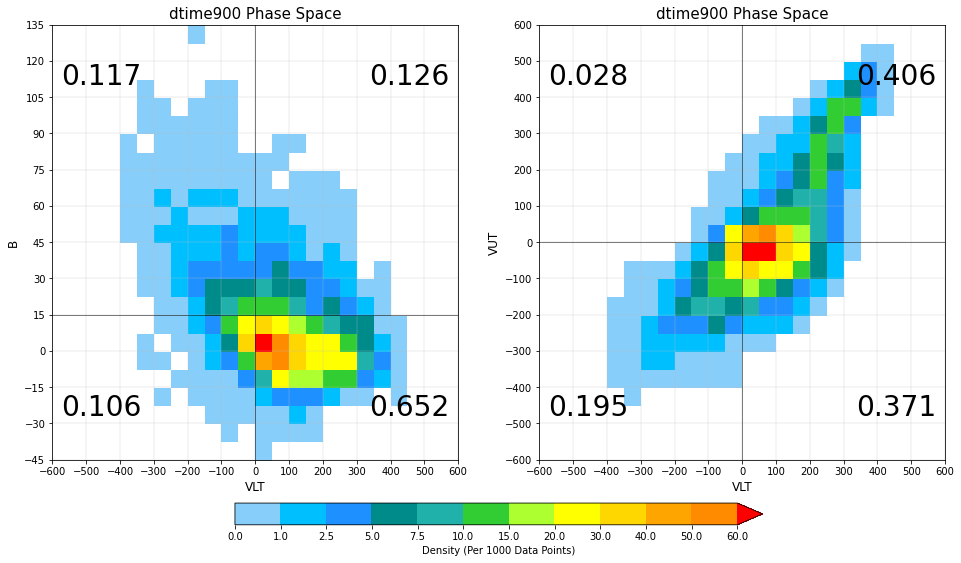

In [19]:
# Plot Cyclone Phase Distribution
def Cyclone_Phase_Dist_Plot(VLT_B, VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Bounds, Colours, Model):
    Fig = pyplot.figure(figsize=(16,8))
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B)):
        for k in range(len(VLT_B[0])):
            Colour = Dist_Colour(VLT_B[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_B, "B")
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT)):
        for l in range(len(VLT_VUT[0])):
            Colour = Dist_Colour(VLT_VUT[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VUT_Bins[l], VUT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_VUT, "VUT")
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Density (Per 1000 Data Points)', ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Cyclone_Phase_Dist_Plot(Dtime900_VLT_B, Dtime900_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "dtime900")

In [20]:
# Repeat For NX2
NX2_DF_Init, NX2_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_nx2_avg')
NX2_DF = Cyclone_Type(NX2_DF_Init, NX2_Storm_List)
#NX2_DF

In [21]:
# Create Cyclone Phase Distribution Plot
NX2_VLT_B, NX2_VLT_VUT = Phase_Space_Distribution(NX2_DF, VLT_Bins, B_Bins, VUT_Bins)
#Fig = Cyclone_Phase_Dist_Plot(NX2_VLT_B, NX2_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX2")

In [22]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff(B_1, VUT_1, B_2, VUT_2):
    B_Diff = B_1 - B_2
    VUT_Diff = VUT_1 - VUT_2
    return (B_Diff, VUT_Diff)

In [23]:
# Create Function of Colours of Cyclone Phase Difference Plots
Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'turquoise', 'limegreen', 'greenyellow', \
'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
#Diff_Bounds = numpy.array([-20,-10,-5,-2.5,-1,-0.5,0,0.5,1,2.5,5,10,20])
Diff_Bounds = numpy.array([-30,-20,-15,-10,-5,-2.5,0,2.5,5,10,15,20,30])
def Diff_Colour(Diff):
    for k in range(len(Diff_Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Diff < Diff_Bounds[k]:
                    Colour = Diff_Colours[k]
            elif k < len(Diff_Colours)-1:
                if Diff <= Diff_Bounds[k] and Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
            else:
                if Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
    return (Colour)

In [24]:
# Plot Cyclone Phase Distribution Difference Between ERA and REA
def Cyclone_Phase_Diff_Plot(Model_1, Model_2, VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours):
# Apply Difference Between Models Function
    VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    Fig = pyplot.figure(figsize=(16,8))
#
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B_Diff)):
        for k in range(len(VLT_B_Diff[0])):
            Colour = Diff_Colour(VLT_B_Diff[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_B_1, "B")) - numpy.array(Phase_Space_Quadrant(VLT_B_2, "B"))
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT_Diff)):
        for l in range(len(VLT_VUT_Diff[0])):
            Colour = Diff_Colour(VLT_VUT_Diff[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VUT_Bins[l], VUT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_VUT_1, "VUT")) - numpy.array(Phase_Space_Quadrant(VLT_VUT_2, "VUT"))
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Diff_Colours, N=len(Diff_Colours))
    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Density Difference (Per 1000 Data Points)', ticks=Diff_Bounds, shrink=0.7)

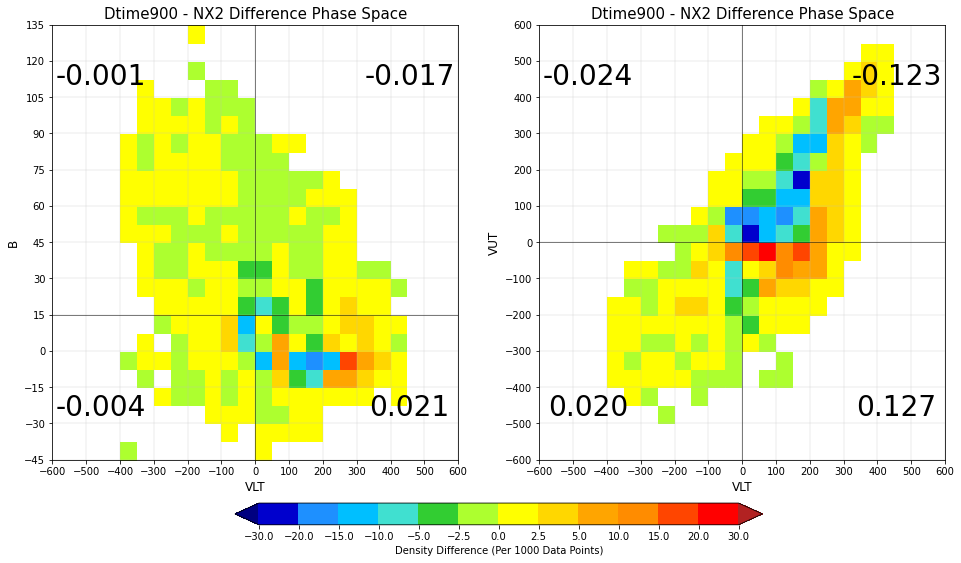

In [25]:
# Plot Cyclone Phase Distribution Difference Between NX2 and DTime900
Cyclone_Phase_Diff_Plot("Dtime900", "NX2", Dtime900_VLT_B, Dtime900_VLT_VUT, NX2_VLT_B, NX2_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)
#Fig.savefig('Dtime900_NX2_Phase_Space_Diff.png', bbox_inches='tight')

In [26]:
# Repeat For NX4
NX4_DF_Init, NX4_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_nx4_avg')
NX4_DF = Cyclone_Type(NX4_DF_Init, NX4_Storm_List)
#NX4_DF

In [27]:
# Create Cyclone Phase Distribution Plot
NX4_VLT_B, NX4_VLT_VUT = Phase_Space_Distribution(NX4_DF, VLT_Bins, B_Bins, VUT_Bins)
#Fig = Cyclone_Phase_Dist_Plot(NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX4")

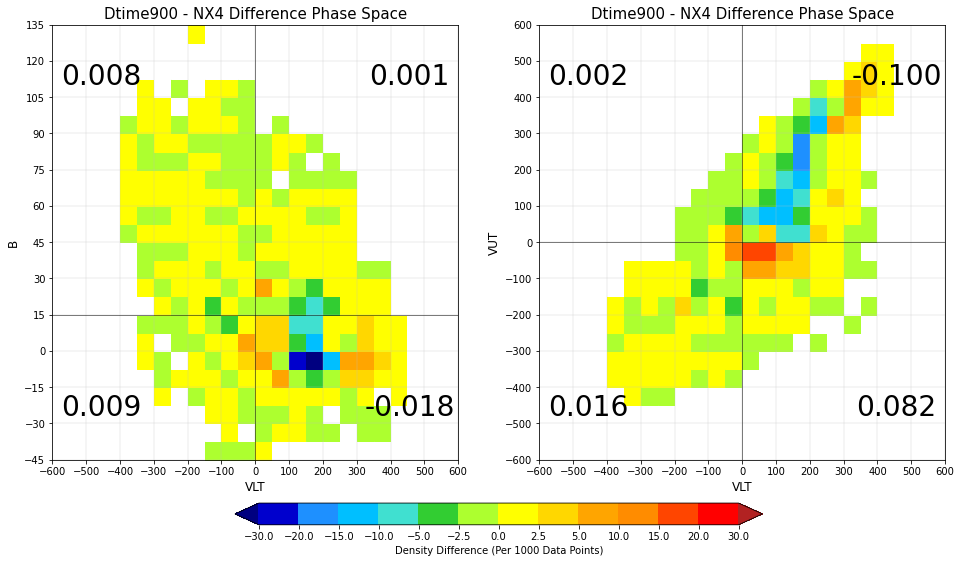

In [28]:
# Plot Cyclone Phase Distribution Difference Between NX4 and DTime900
Cyclone_Phase_Diff_Plot("Dtime900", "NX4", Dtime900_VLT_B, Dtime900_VLT_VUT, NX4_VLT_B, NX4_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)
#Fig.savefig('Dtime900_NX4_Phase_Space_Diff.png', bbox_inches='tight')

In [29]:
# Create Lat Lon Bins
def Lat_Lon_Bins(Lat_Min, Lat_Max, Lat_Bin_Width, Lon_Min, Lon_Max, Lon_Bin_Width):
    Lat_Bins = numpy.arange(Lat_Min, Lat_Max+Lat_Bin_Width, Lat_Bin_Width)
    Lon_Bins = numpy.arange(Lon_Min, Lon_Max+Lon_Bin_Width, Lon_Bin_Width)
    return (Lat_Bins, Lon_Bins)
#Lat_Bins, Lon_Bins = Lat_Lon_Bins(0,65,5,-105,15,5)
Lat_Bins, Lon_Bins = Lat_Lon_Bins(0,65,5,-105,15,5)

In [30]:
# Create Function to Calculate Spatial Distribution of B Value
def Spatial_Distribution(DF, Var, Lat_Bins, Lon_Bins):
    Lat_Lon_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Lat_Lon_Values_Sum = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Lat_Lon_Values_Mean = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
#    Length = len(DF["VLT"])
#    VLT_Width = numpy.zeros(len(VLT_Bins)-1)
#    B_Width = numpy.zeros(len(B_Bins)-1)
#    VUT_Width = numpy.zeros(len(VUT_Bins)-1)
#    VLT_B_Density = numpy.zeros((len(VLT_B_Count), len(VLT_B_Count[0])))
#    VLT_VUT_Density = numpy.zeros((len(VLT_VUT_Count), len(VLT_VUT_Count[0])))
#
# Create Boundaries For Values to Ignore NaN and Ignore WeakStorms With SLP > 1010hPa
    if Var == "VLT" or Var == "VUT":
        Value_Bounds = numpy.array([Bins_Bounds[0],Bins_Bounds[1]])
    if Var == "B":
        Value_Bounds = numpy.array([Bins_Bounds[3],Bins_Bounds[4]])
    SLP_Bounds = 1010
#
# Count Lat Lon Distribution and Sum of Values in Each Gridbox
    for i in range(len(DF[Var])):
        if DF["SLP(hPa)"][i] <= SLP_Bounds:
            if DF[Var][i] >= Value_Bounds[0] and DF[Var][i] <= Value_Bounds[1]:
                for j in range(len(Lat_Bins)-1):
                    if DF["Lat"][i] > Lat_Bins[j] and DF["Lat"][i] <= Lat_Bins[j+1]:
                        for k in range(len(Lon_Bins)-1):
                            if DF["Lon"][i] > Lon_Bins[k] and DF["Lon"][i] <= Lon_Bins[k+1]:
                                Lat_Lon_Count[j][k] += 1
                                Lat_Lon_Values_Sum[j][k] += DF[Var][i]
#
# Calculate Average Value in Each Gridbox
    for j in range(len(Lat_Lon_Count)):
        for k in range(len(Lat_Lon_Count[j])):
# Ignore Gridboxes with <= 5 Values
            if Lat_Lon_Count[j][k] > 10:
                Lat_Lon_Values_Mean[j][k] = Lat_Lon_Values_Sum[j][k] / Lat_Lon_Count[j][k]
    return (Lat_Lon_Count, Lat_Lon_Values_Mean)
Dtime900_Spatial_Count, Dtime900_Spatial_B = Spatial_Distribution(Dtime900_DF, "B", Lat_Bins, Lon_Bins)

In [31]:
# Create Function For Spatial Distribution Count Colours
Spatial_Count_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Spatial_Count_Bounds = numpy.array([0,2,5,10,20,30,40,50,75,100,125,150])
#Spatial_Count_Bounds = numpy.array([0,1,3,5,10,15,20,25,30,40,50,60])
#
def Spatial_Count_Colour(Density):
    for k in range(len(Spatial_Count_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k != len(Spatial_Count_Colours)-1:
                if Density <= Spatial_Count_Bounds[k+1] and Density > Spatial_Count_Bounds[k]:
                    Colour = Spatial_Count_Colours[k]
            else:
                if Density > Spatial_Count_Bounds[k]:
                    Colour = Spatial_Count_Colours[k]
    return (Colour)

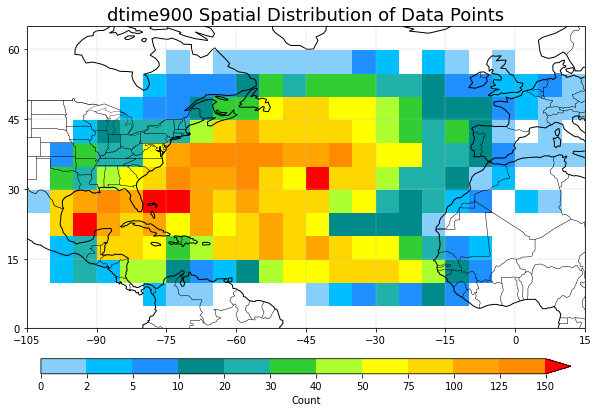

In [32]:
# Plot Spatial Distribution Count of Data Points
def Spatial_Count_Plot(Spatial_Count, Lat_Bins, Lon_Bins, Bounds, Colours, Model):
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#
# Add Coastlines
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
# 
# Plot Data
    for j in range(len(Spatial_Count)):
        for k in range(len(Spatial_Count[0])):
            Colour = Spatial_Count_Colour(Spatial_Count[j][k])
#            print ([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], Colour)
            pyplot.fill_between([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    x_Axis = numpy.arange(-105,30,15)
    y_Axis = numpy.arange(0,75,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-105,15)
    pyplot.ylim(0,65)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#    pyplot.xlabel('VLT', fontsize=12)
#    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Spatial Distribution of Data Points'), fontsize=18)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Count", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Count', ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Spatial_Count_Plot(Dtime900_Spatial_Count, Lat_Bins, Lon_Bins, Spatial_Count_Bounds, Spatial_Count_Colours, "dtime900")

In [33]:
# Create Function For B Value Colours
B_Colours = ['red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', 'turquoise', 'deepskyblue', 'dodgerblue', 'mediumblue', 'navy']
#B_Bounds = numpy.arange(-15,75,5)
B_Bounds = numpy.array([-10,-5,0,5,10,15,20,25,30,40,50,60])
#print (len(B_Colours))
#print (len(B_Bounds))
#
def B_Colour(Density):
    for k in range(len(B_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Density <= B_Bounds[k]:
                    Colour = B_Colours[k]
            if k != len(B_Colours)-1:
                if Density <= B_Bounds[k] and Density > B_Bounds[k-1]:
                    Colour = B_Colours[k]
            else:
                if Density > B_Bounds[k-1]:
                    Colour = B_Colours[k]
    return (Colour)

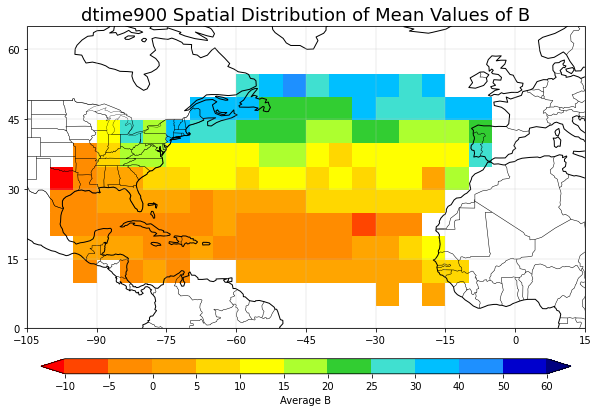

In [34]:
# Plot Spatial Distribution of B Values
def Spatial_B_Plot(Spatial_B, Lat_Bins, Lon_Bins, Bounds, Colours, Var, Model):
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#
# Add Coastlines
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
# 
# Plot Data
    for j in range(len(Spatial_B)):
        for k in range(len(Spatial_B[0])):
            Colour = B_Colour(Spatial_B[j][k])
#            print ([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], Colour)
            pyplot.fill_between([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    x_Axis = numpy.arange(-105,30,15)
    y_Axis = numpy.arange(0,75,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-105,15)
    pyplot.ylim(0,65)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#    pyplot.xlabel('VLT', fontsize=12)
#    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Spatial Distribution of Mean Values of ' + Var), fontsize=18)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list(str("Average " + Var), Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=str("Average " + Var), ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Spatial_B_Plot(Dtime900_Spatial_B, Lat_Bins, Lon_Bins, B_Bounds, B_Colours, "B", "dtime900")

In [35]:
# Calculate Spatial Distribution of VLT
Dtime900_Spatial_Count, Dtime900_Spatial_VLT = Spatial_Distribution(Dtime900_DF, "VLT", Lat_Bins, Lon_Bins)
#print (Dtime900_Spatial_VLT)

In [36]:
print (numpy.min(Dtime900_Spatial_VLT))
print (numpy.max(Dtime900_Spatial_VLT))

-122.66999999999999
227.8355263157897


In [37]:
# Create Function For VLT and VUT Value Colours
#VLT_Bounds = numpy.array([-250,-200,-150,-100,-50,0,50,100,150,200,250])
VLT_Bounds = numpy.array([-200,-150,-100,-50,0,50,100,150,200])
VLT_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
#print (len(VLT_Colours))
#print (len(VLT_Bounds))
#
def VLT_Colour(Density):
    for k in range(len(VLT_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Density <= VLT_Bounds[k]:
                    Colour = VLT_Colours[k]
            if k != len(VLT_Colours)-1:
                if Density <= VLT_Bounds[k] and Density > VLT_Bounds[k-1]:
                    Colour = VLT_Colours[k]
            else:
                if Density > VLT_Bounds[k-1]:
                    Colour = VLT_Colours[k]
    return (Colour)

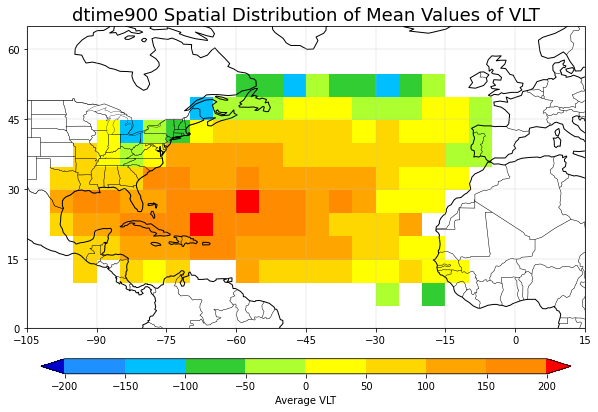

In [38]:
# Plot Spatial Distribution of VLT Values
def Spatial_VT_Plot(Spatial_VLT, Lat_Bins, Lon_Bins, Bounds, Colours, Var, Model):
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#
# Add Coastlines
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
# 
# Plot Data
    for j in range(len(Spatial_VLT)):
        for k in range(len(Spatial_VLT[0])):
            Colour = VLT_Colour(Spatial_VLT[j][k])
#            print ([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], Colour)
            pyplot.fill_between([Lon_Bins[k],Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    x_Axis = numpy.arange(-105,30,15)
    y_Axis = numpy.arange(0,75,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-105,15)
    pyplot.ylim(0,65)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#    pyplot.xlabel('VLT', fontsize=12)
#    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Spatial Distribution of Mean Values of ' + Var), fontsize=18)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list(str("Average " + Var), Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=str("Average " + Var), ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Spatial_VT_Plot(Dtime900_Spatial_VLT, Lat_Bins, Lon_Bins, VLT_Bounds, VLT_Colours, "VLT", "dtime900")

In [39]:
# Calculate Spatial Distribution of VUT
Dtime900_Spatial_Count, Dtime900_Spatial_VUT = Spatial_Distribution(Dtime900_DF, "VUT", Lat_Bins, Lon_Bins)
#print (Dtime900_Spatial_VUT)

In [40]:
print (numpy.min(Dtime900_Spatial_VUT))
print (numpy.max(Dtime900_Spatial_VUT))

-162.08285714285716
137.72342105263158


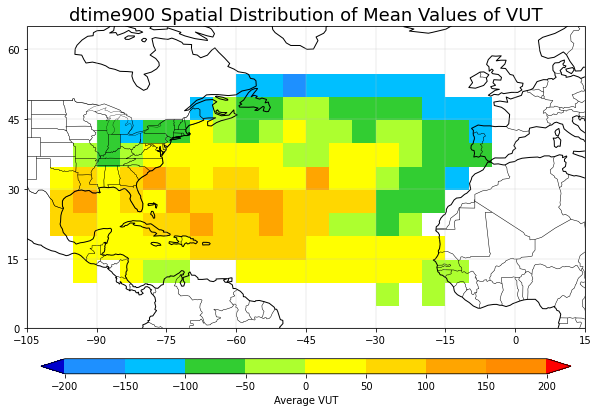

In [41]:
# Plot Spatial Distribution of VUT Values
Fig = Spatial_VT_Plot(Dtime900_Spatial_VUT, Lat_Bins, Lon_Bins, VLT_Bounds, VLT_Colours, "VUT", "dtime900")

In [42]:
# Open File
Dtime1800_DF_Init, Dtime1800_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/traj_data/traj_et_dtime1800_avg')
Dtime1800_DF_Init

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
0,0009,-76.32,39.50,988.75,21.6,-999.00,-999.00,41.83,-65.87,-60.61,1985-04-24 06:00:00
1,0009,-72.81,41.00,989.16,20.7,341.48,60.33,25.58,-6.04,-69.09,1985-04-24 12:00:00
2,0009,-71.07,41.56,989.06,21.0,157.74,66.64,22.95,-5.16,-71.54,1985-04-24 18:00:00
3,0009,-69.34,42.12,988.97,21.4,156.59,66.46,18.34,9.69,-60.04,1985-04-25 00:00:00
4,0009,-67.60,42.68,988.88,21.7,155.44,66.27,8.47,43.78,-32.43,1985-04-25 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...
6650,0907,-49.75,30.00,1014.65,14.2,60.61,336.63,1.60,-44.56,-59.59,2006-11-25 12:00:00
6651,0907,-50.00,31.00,1013.25,12.3,113.75,347.95,7.97,-95.70,-85.98,2006-11-25 18:00:00
6652,0907,-50.00,33.25,1014.51,16.0,250.20,0.00,22.00,-160.79,-128.69,2006-11-26 00:00:00
6653,0907,-48.50,35.50,1011.78,22.5,285.56,28.28,29.81,-206.17,-151.63,2006-11-26 06:00:00


In [43]:
Dtime1800_DF = Cyclone_Type(Dtime1800_DF_Init, Dtime1800_Storm_List)

In [44]:
Dtime1800_DF[Dtime1800_DF['SLP(hPa)'] <= 910]

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape,Colour
98,0019,-77.62,28.90,909.46,68.5,22.10,230.10,-2.84,321.07,458.29,1985-08-29 00:00:00,Tropical,o,indigo
101,0019,-76.99,29.36,903.49,74.1,57.85,50.14,9.45,332.63,451.57,1985-08-29 18:00:00,Tropical,o,indigo
102,0019,-76.35,29.82,908.89,70.7,79.95,50.38,13.40,327.56,454.52,1985-08-30 00:00:00,Tropical,o,indigo


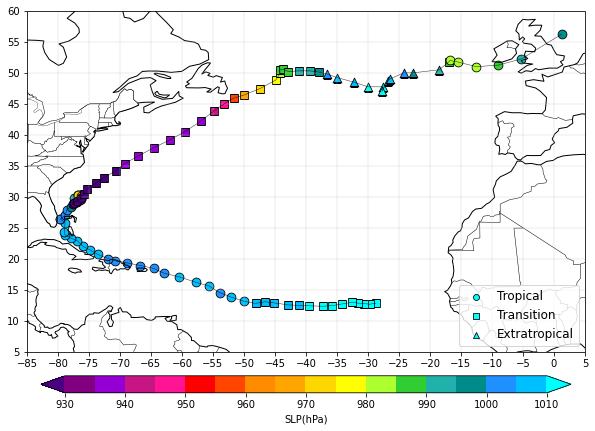

In [45]:
Plot_Cyclone_Track('0019', Dtime1800_DF, SLP_Bounds, SLP_Colours, 4)

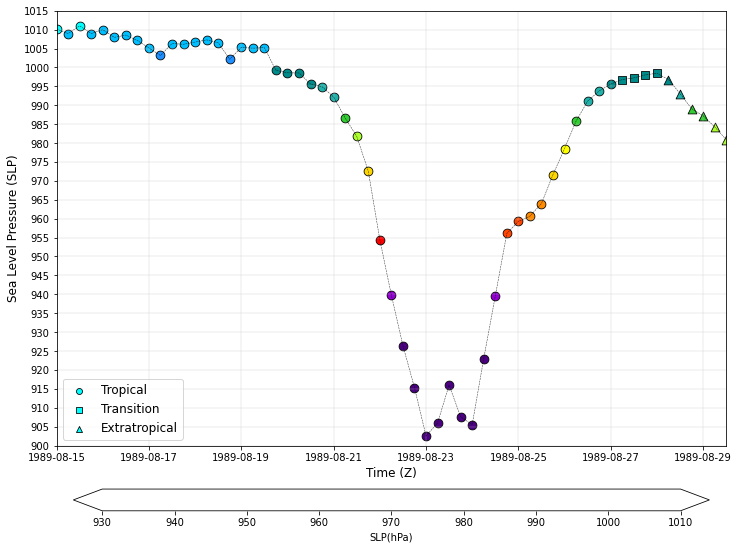

In [46]:
Plot_Cyclone_SLP('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 3)

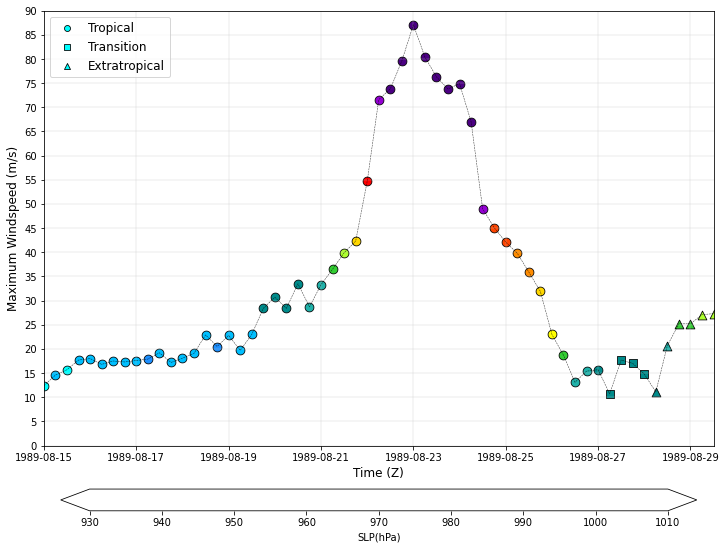

In [47]:
Plot_Cyclone_Winds('0236', Dtime900_DF, SLP_Bounds, SLP_Colours, 2)

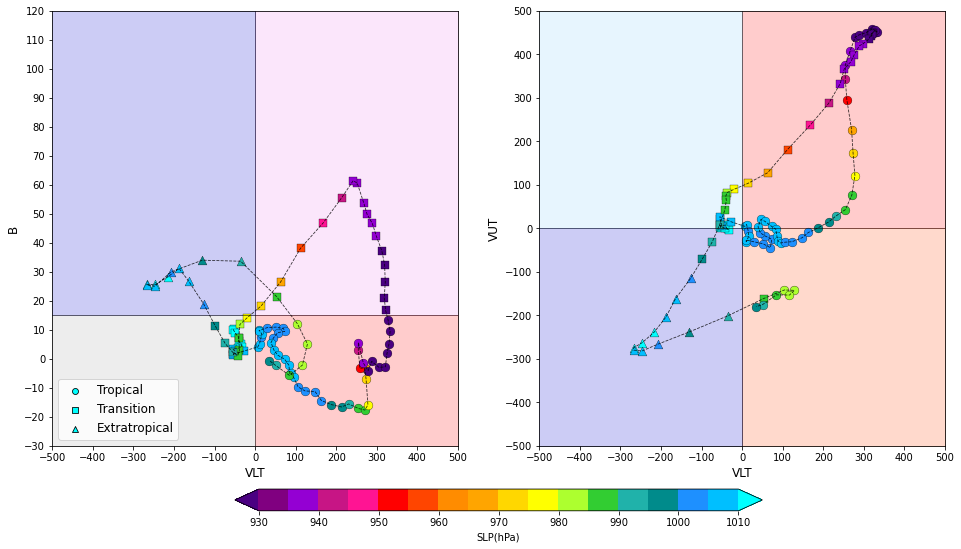

In [48]:
Plot_Cyclone_Phase('0019', Dtime1800_DF, SLP_Bounds, SLP_Colours, 3)

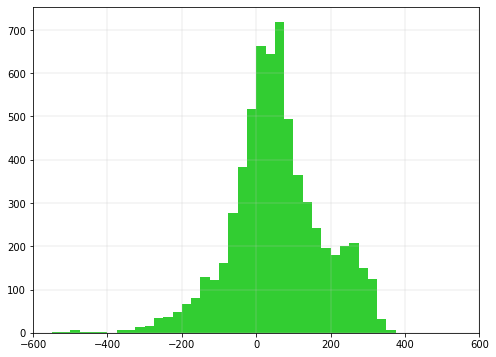

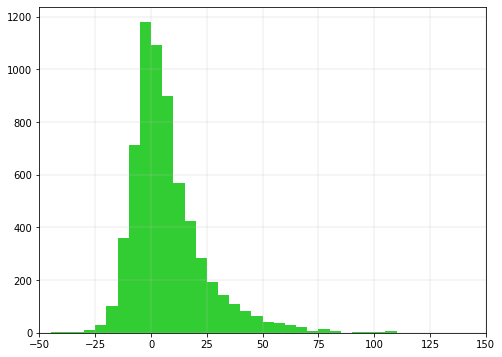

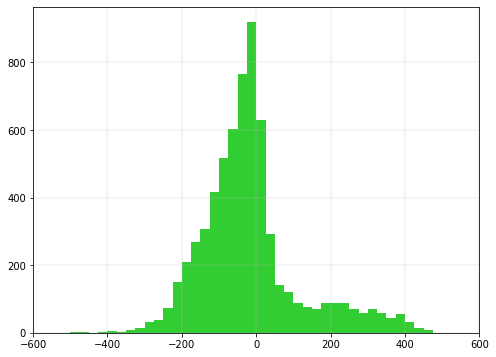

In [49]:
# Histogram of VLT Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime1800_DF["VLT"], bins=numpy.arange(-1000,625,25), color='limegreen')
pyplot.xlim(-600,600)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of B Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime1800_DF["B"], bins=numpy.arange(-50,135,5), color='limegreen')
pyplot.xlim(-50,150)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of VLT Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime1800_DF["VUT"], bins=numpy.arange(-1000,625,25), color='limegreen')
pyplot.xlim(-600,600)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

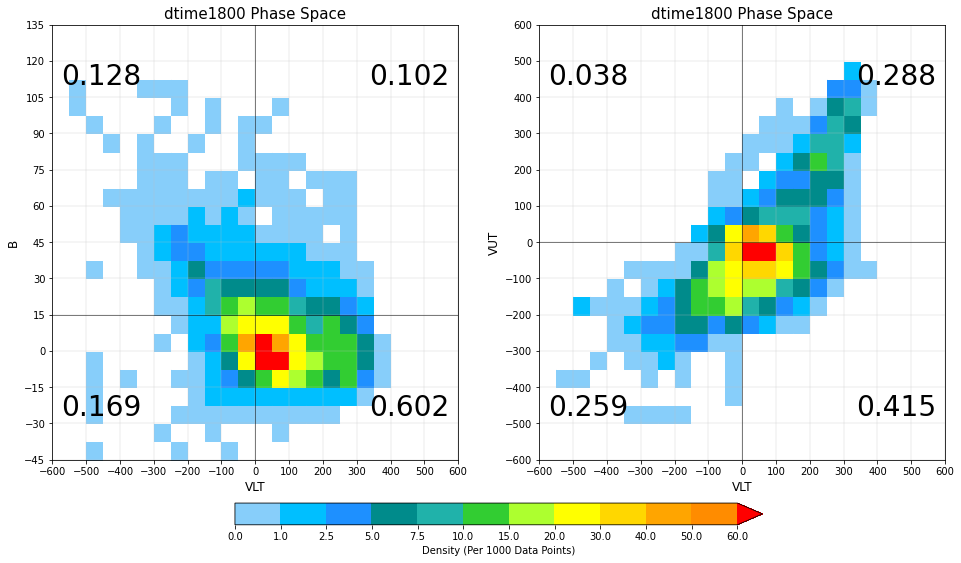

In [51]:
Dtime1800_VLT_B, Dtime1800_VLT_VUT = Phase_Space_Distribution(Dtime1800_DF, VLT_Bins, B_Bins, VUT_Bins)
Fig = Cyclone_Phase_Dist_Plot(Dtime1800_VLT_B, Dtime1800_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "dtime1800")

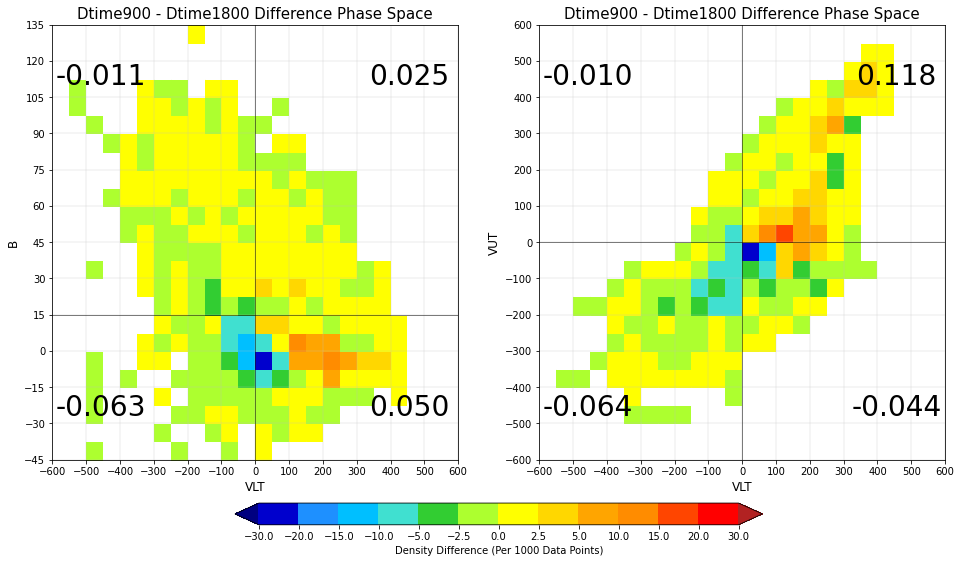

In [52]:
Cyclone_Phase_Diff_Plot("Dtime900", "Dtime1800", Dtime900_VLT_B, Dtime900_VLT_VUT, Dtime1800_VLT_B, Dtime1800_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)

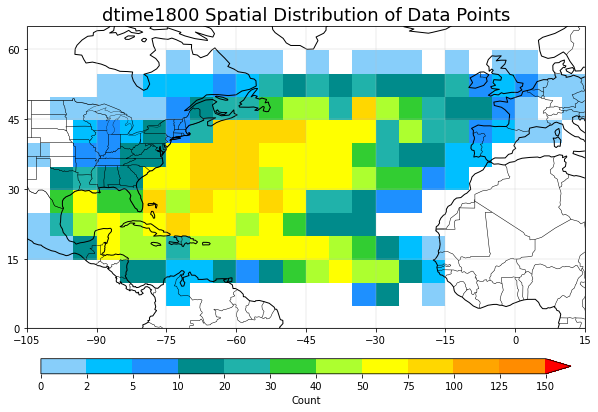

In [54]:
Dtime1800_Spatial_Count, Dtime1800_Spatial_B = Spatial_Distribution(Dtime1800_DF, "B", Lat_Bins, Lon_Bins)
Fig = Spatial_Count_Plot(Dtime1800_Spatial_Count, Lat_Bins, Lon_Bins, Spatial_Count_Bounds, Spatial_Count_Colours, "dtime1800")

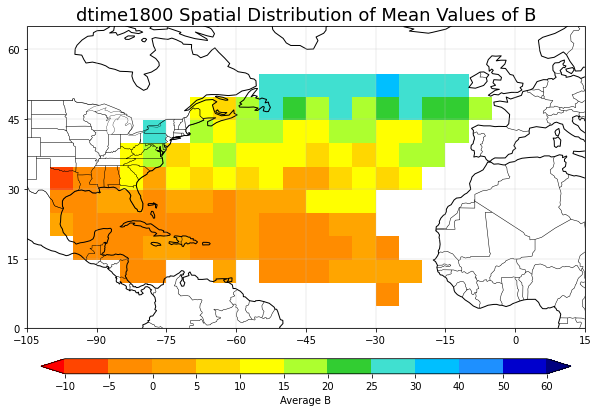

In [55]:
Fig = Spatial_B_Plot(Dtime1800_Spatial_B, Lat_Bins, Lon_Bins, B_Bounds, B_Colours, "B", "dtime1800")

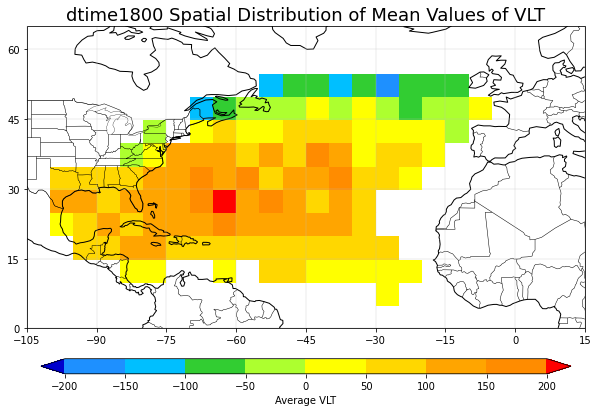

In [58]:
Dtime1800_Spatial_Count, Dtime1800_Spatial_VLT = Spatial_Distribution(Dtime1800_DF, "VLT", Lat_Bins, Lon_Bins)
Fig = Spatial_VT_Plot(Dtime1800_Spatial_VLT, Lat_Bins, Lon_Bins, VLT_Bounds, VLT_Colours, "VLT", "dtime1800")

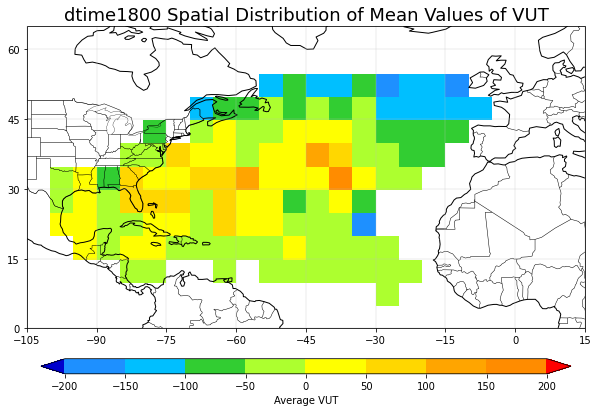

In [59]:
Dtime1800_Spatial_Count, Dtime1800_Spatial_VUT = Spatial_Distribution(Dtime1800_DF, "VUT", Lat_Bins, Lon_Bins)
Fig = Spatial_VT_Plot(Dtime1800_Spatial_VUT, Lat_Bins, Lon_Bins, VLT_Bounds, VLT_Colours, "VUT", "dtime1800")

In [61]:
# Open File
Dtime3600_DF_Init, Dtime3600_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/traj_data/traj_et_tau3600_avg')
Dtime3600_DF_Init

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
0,0008,-41.73,26.80,1009.31,21.4,-999.00,-999.00,22.21,-244.14,-210.08,1985-03-12 18:00:00
1,0008,-40.34,28.49,1006.94,23.9,232.95,35.73,21.25,-99.80,-209.09,1985-03-13 00:00:00
2,0008,-38.95,30.18,1004.57,26.4,231.67,35.28,18.09,-72.99,-188.48,1985-03-13 06:00:00
3,0008,-37.55,31.87,1002.19,29.0,230.34,34.79,12.03,-8.86,-161.34,1985-03-13 12:00:00
4,0008,-37.69,34.31,994.61,31.9,271.18,357.39,4.85,66.47,-118.96,1985-03-13 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...
12120,1471,-43.35,44.13,970.31,39.8,314.21,359.59,12.07,197.64,-7.59,2006-11-19 00:00:00
12121,1471,-43.95,47.54,962.87,42.0,382.90,353.31,-999.00,-999.00,-999.00,2006-11-19 06:00:00
12122,1471,-44.71,51.13,963.69,37.2,402.19,352.50,-999.00,-999.00,-999.00,2006-11-19 12:00:00
12123,1471,-45.15,54.75,966.23,34.7,403.85,356.07,-999.00,-999.00,-999.00,2006-11-19 18:00:00


In [62]:
Dtime3600_DF = Cyclone_Type(Dtime3600_DF_Init, Dtime3600_Storm_List)

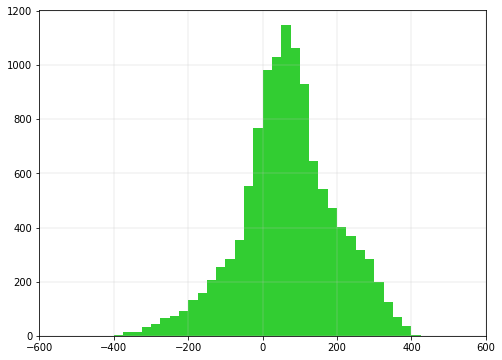

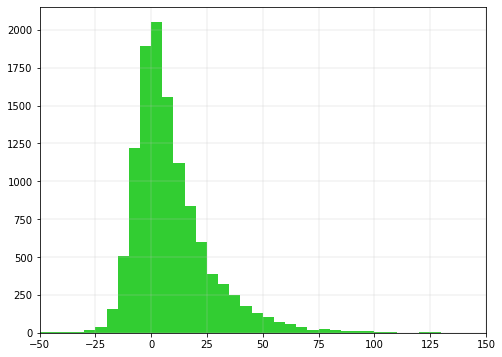

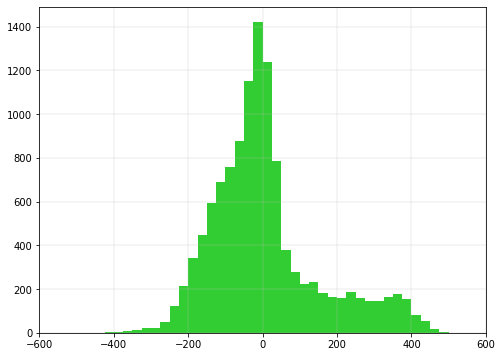

In [63]:
# Histogram of VLT Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime3600_DF["VLT"], bins=numpy.arange(-1000,625,25), color='limegreen')
pyplot.xlim(-600,600)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of B Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime3600_DF["B"], bins=numpy.arange(-50,135,5), color='limegreen')
pyplot.xlim(-50,150)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

# Histogram of VLT Values
Fig = pyplot.figure(figsize=(8,6))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime3600_DF["VUT"], bins=numpy.arange(-1000,625,25), color='limegreen')
pyplot.xlim(-600,600)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

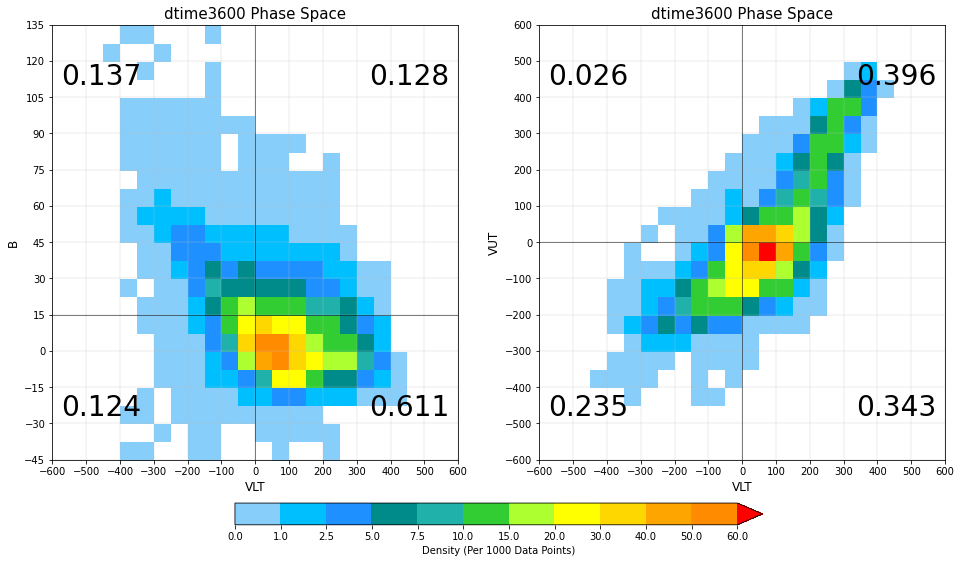

In [64]:
Dtime3600_VLT_B, Dtime3600_VLT_VUT = Phase_Space_Distribution(Dtime3600_DF, VLT_Bins, B_Bins, VUT_Bins)
Fig = Cyclone_Phase_Dist_Plot(Dtime3600_VLT_B, Dtime3600_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "dtime3600")

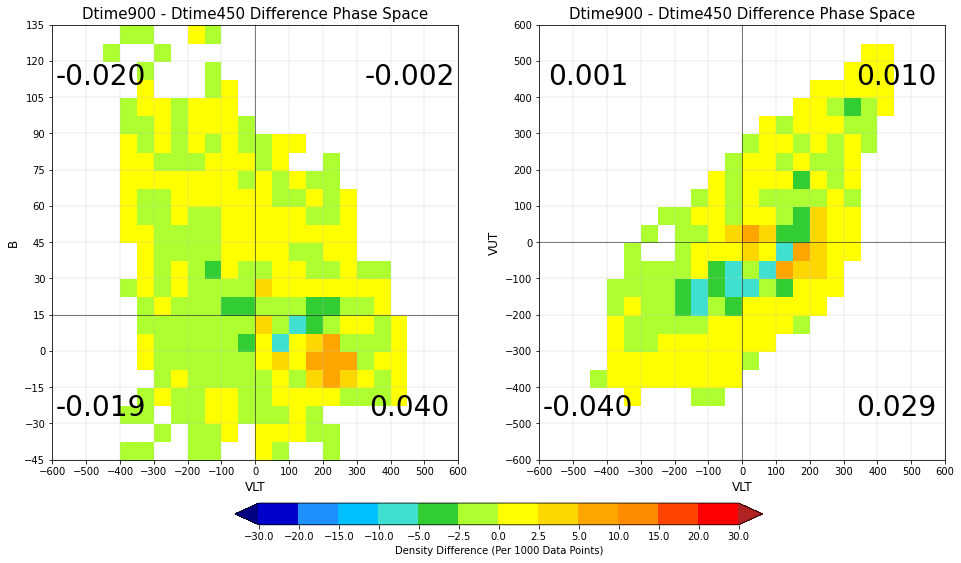

In [67]:
Cyclone_Phase_Diff_Plot("Dtime900", "Dtime450", Dtime900_VLT_B, Dtime900_VLT_VUT, Dtime3600_VLT_B, Dtime3600_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)

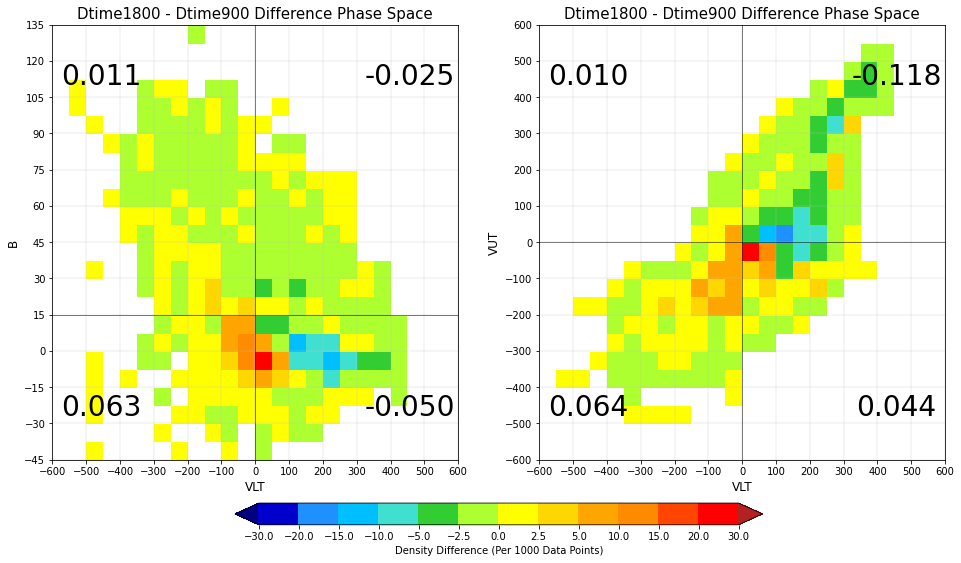

In [70]:
Cyclone_Phase_Diff_Plot("Dtime1800", "Dtime900", Dtime1800_VLT_B, Dtime1800_VLT_VUT, Dtime900_VLT_B, Dtime900_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)

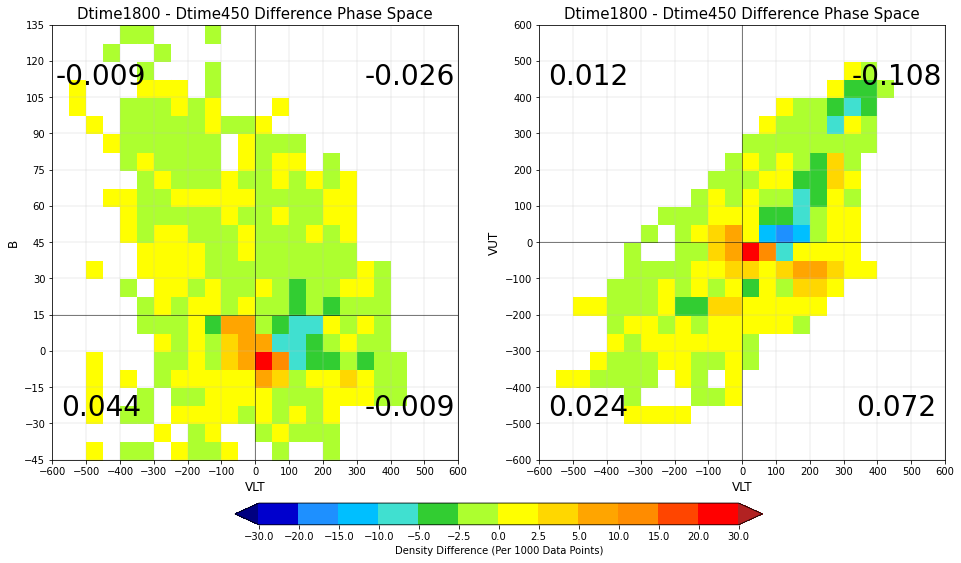

In [71]:
Cyclone_Phase_Diff_Plot("Dtime1800", "Dtime450", Dtime1800_VLT_B, Dtime1800_VLT_VUT, Dtime3600_VLT_B, Dtime3600_VLT_VUT, \
VLT_Bins, B_Bins, VUT_Bins, Diff_Bounds, Diff_Colours)

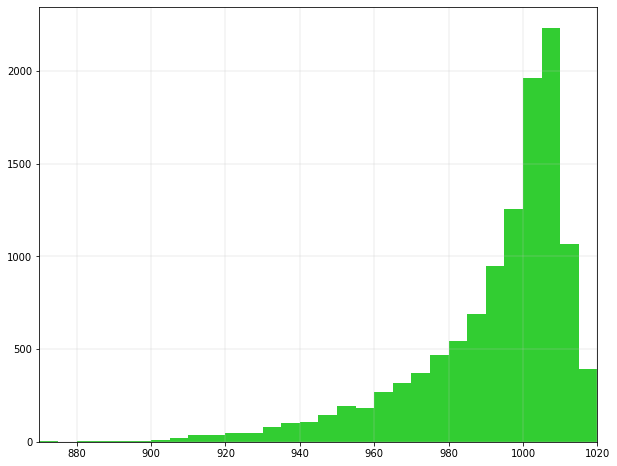

In [75]:
# Histogram of SLP
Fig = pyplot.figure(figsize=(10,8))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime900_DF["SLP(hPa)"], bins=numpy.arange(870,1030,5), color='limegreen')
pyplot.xlim(870,1020)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

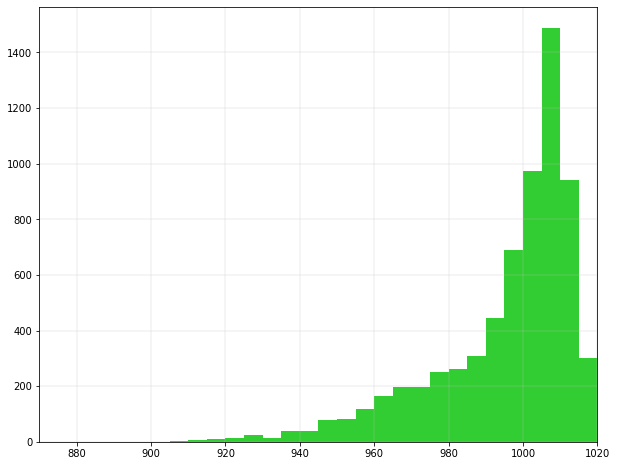

In [76]:
# Histogram of SLP
Fig = pyplot.figure(figsize=(10,8))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime1800_DF["SLP(hPa)"], bins=numpy.arange(870,1030,5), color='limegreen')
pyplot.xlim(870,1020)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

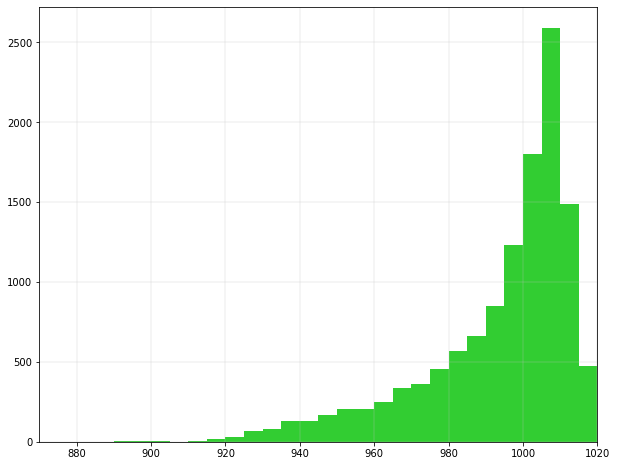

In [77]:
# Histogram of SLP
Fig = pyplot.figure(figsize=(10,8))
Axis = Fig.add_subplot(1,1,1)
Axis.hist(Dtime3600_DF["SLP(hPa)"], bins=numpy.arange(870,1030,5), color='limegreen')
pyplot.xlim(870,1020)
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [82]:
# Create List Containing Each Model Data For Making Box Plots
SLP_Box = [numpy.array(Dtime3600_DF["SLP(hPa)"]), numpy.array(Dtime900_DF["SLP(hPa)"]), numpy.array(Dtime1800_DF["SLP(hPa)"])]
Winds_Box = [numpy.array(Dtime3600_DF["Winds(m/s)"]), numpy.array(Dtime900_DF["Winds(m/s)"]), numpy.array(Dtime1800_DF["Winds(m/s)"])]
#
# Formatting
Colours = ['limegreen', 'turquoise', 'deepskyblue']
Models = ['dtime450', 'dtime900', 'dtime1800']
def Formatting(Boxplot, Axis, Colours, Models):
    Axis.set_yticklabels(Models, fontsize=10)
    Axis.set_ylabel('Model', fontsize=12)
    for Patch, Colour in zip(Boxplot['boxes'], Colours): 
        Patch.set_facecolor(Colour)
    for Median in Boxplot['medians']: 
        Median.set(color='black', linewidth=1.8)
    for Flier in Boxplot['fliers']:
        Flier.set(marker='x', markersize=3.8, alpha=0.3)

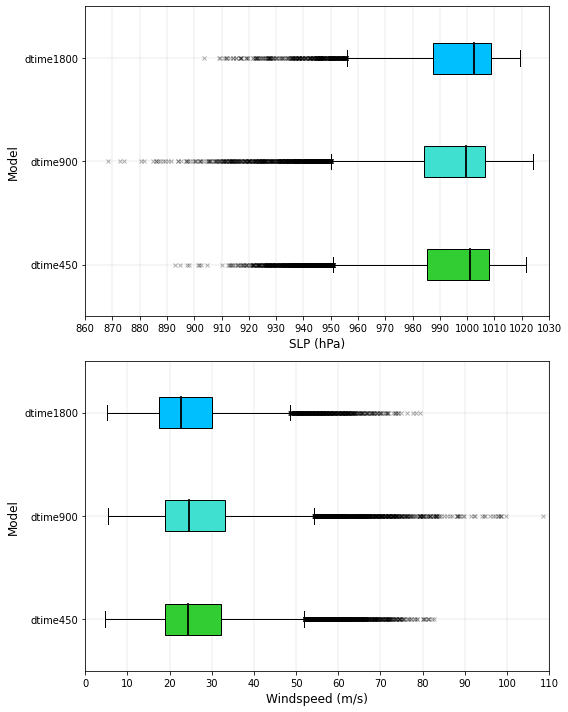

In [83]:
# Plot Box Plots
Fig = pyplot.figure(figsize=(8,10))
#
# Sea Level Pressure
Axis = Fig.add_subplot(2,1,1)
SLP_Boxplot = pyplot.boxplot(SLP_Box, patch_artist=True, vert=0)
Formatting(SLP_Boxplot, Axis, Colours, Models)
Axis.set_xlabel('SLP (hPa)', fontsize=12)
Axis.set_xlim(860,1030)
Axis.set_xticks(numpy.arange(860,1040,10))
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Windspeed
Axis = Fig.add_subplot(2,1,2)
Winds_Boxplot = pyplot.boxplot(Winds_Box, patch_artist=True, vert=0)
Formatting(Winds_Boxplot, Axis, Colours, Models)
Axis.set_xlabel('Windspeed (m/s)', fontsize=12)
Axis.set_xlim(0,110)
Axis.set_xticks(numpy.arange(0,120,10))
Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Output Fig
pyplot.tight_layout()
#Fig.savefig('Q2b.png', bbox_inches='tight')